In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Expanded_data_with_more_features.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [4]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [6]:
#Dropping the unnamed column
df.drop('Unnamed: 0',axis=1 , inplace=True)

In [7]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [8]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

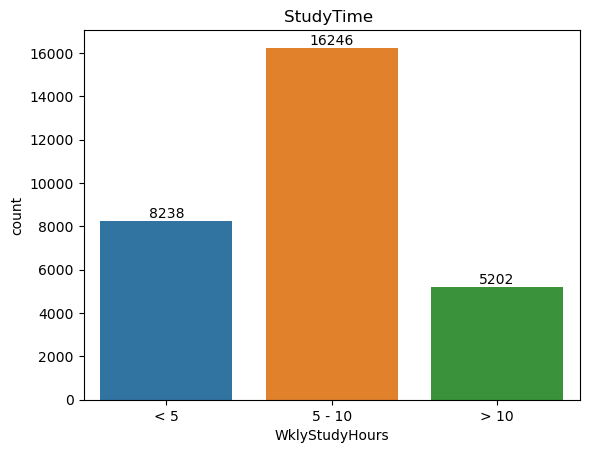

In [37]:
ay=sns.countplot(data=df , x='WklyStudyHours')
plt.title("StudyTime ")

for bars in ay.containers:
    ay.bar_label(bars)
    
#we with help of graph we can clearly see that most of the student study between 5 to 10 hrs

[Text(0, 0, '15424'), Text(0, 0, '15217')]

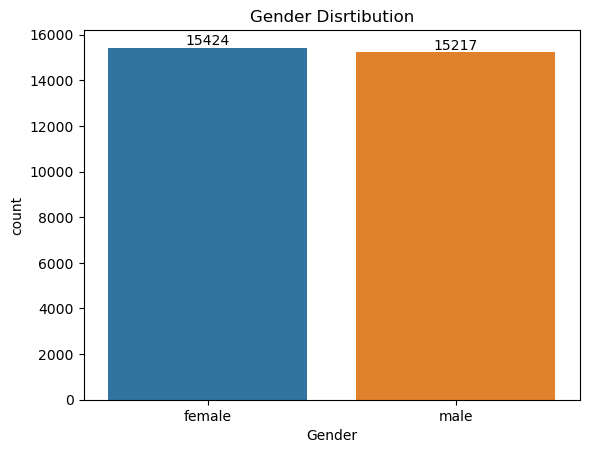

<Figure size 300x200 with 0 Axes>

In [33]:
#Gender Distribution 

ax=sns.countplot(data=df, x="Gender")
plt.title("Gender Disrtibution")

plt.figure(figsize=(3,2))

ax.bar_label(ax.containers[0])

        
#Graph is clearly telling us that Female count is more than Male

In [11]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [12]:

#Grouping by ParentEducation column to know the impact of parent's education on their childs
par_edu=df.groupby('ParentEduc').agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})

In [13]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [14]:

df['ParentEduc'].head()

0     bachelor's degree
1          some college
2       master's degree
3    associate's degree
4          some college
Name: ParentEduc, dtype: object

Text(0.5, 1.0, 'Relationship Between Parents Education and Student Marks')

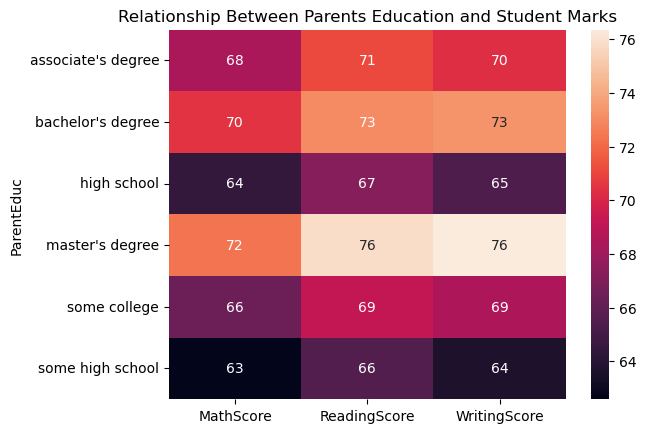

In [34]:
sns.heatmap(par_edu ,annot=True)
plt.title("Relationship Between Parents Education and Student Marks")
#A heat map is a 2-dimensional data visualization technique that represents the magnitude 
#of individual values within a dataset as a color. The variation in color may be by hue or intensity.

In [16]:
#With the help of above graph we can say that parent's education is clearly impacting their child

In [17]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [23]:
Parent_Mar=df.groupby('ParentMaritalStatus').agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'}).sort_values('MathScore', ascending = False)

In [24]:
Parent_Mar

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
widowed,67.368866,69.651438,68.563452
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440


Text(0.5, 1.0, 'Relationship between ParentsMarital Status and Students marks ')

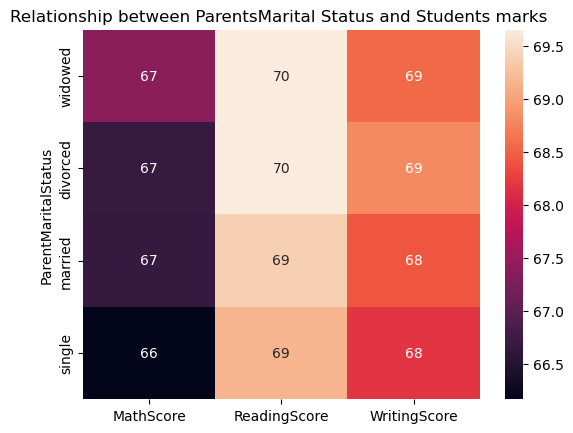

In [36]:
sns.heatmap(Parent_Mar, annot=True)
plt.title("Relationship between ParentsMarital Status and Students marks ")
#Below graph is showing that  there is no such impact of Parents marital status on students marks

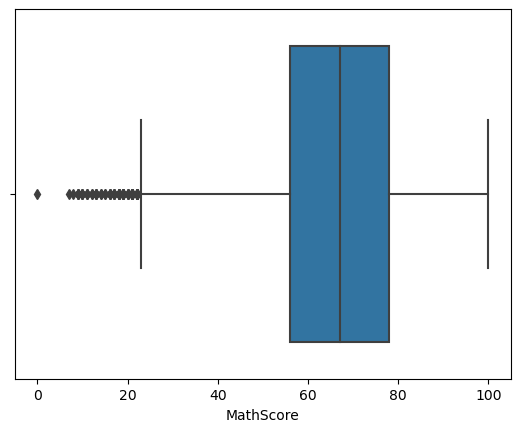

In [41]:
sns.boxplot(data=df , x='MathScore')
plt.show()

#Boxplot help us to get the outliers 

Text(0.5, 1.0, 'Distribution of Ethnic Groups')

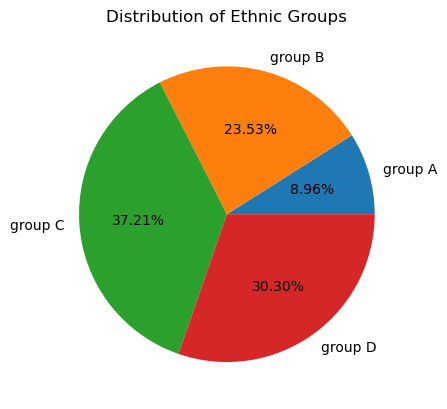

In [61]:
#Distribution of ethnic group 
GroupA=df.loc[(df['EthnicGroup']=='group A')].count()
GroupB=df.loc[(df['EthnicGroup']=='group B')].count()
GroupC=df.loc[(df['EthnicGroup']=='group C')].count()
GroupD=df.loc[(df['EthnicGroup']=='group D')].count()
l=["group A", "group B" ,"group C","group D"]
#The DataFrame. loc[] is used to retrieve the group of rows and columns by labels or a boolean array in the DataFrame
GroupList=[GroupA['EthnicGroup'], GroupB['EthnicGroup'], GroupC['EthnicGroup'] , GroupD['EthnicGroup']]

plt.pie(GroupList , labels=l , autopct="%.2f%%")
plt.title("Distribution of Ethnic Groups")

In [ ]:
#With the above pie chart we can say that 37.21% of students from the "Group C"